<a href="https://colab.research.google.com/github/Sornambal/Cognifyz-Technology-Internship-Level-2/blob/main/Cognifyz_Level_2(Task_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🏷️ Most Common Price Range: 1

⭐ Average Rating by Price Range:
   Price range  Aggregate rating
0            1          1.999887
1            2          2.941054
2            3          3.683381
3            4          3.817918

🎨 Rating color representing the highest average rating: Yellow


/tmp/ipython-input-1-3017585039.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_rating_by_price, x='Price range', y='Aggregate rating', palette='viridis')


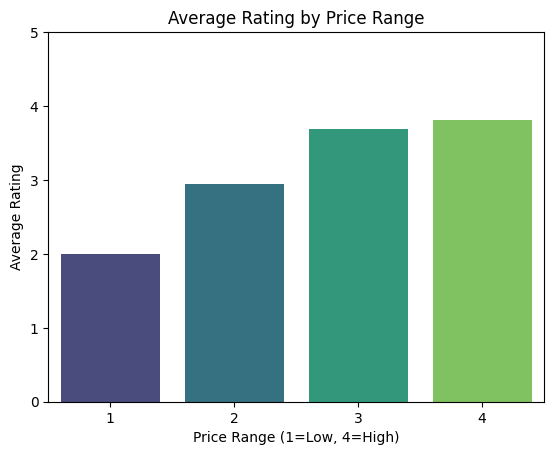

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/Dataset .csv')

# Clean and handle necessary fields
df = df.dropna(subset=['Price range', 'Aggregate rating', 'Rating color'])

# 1️⃣ Most common price range
most_common_price_range = df['Price range'].mode()[0]
print(f"🏷️ Most Common Price Range: {most_common_price_range}")

# 2️⃣ Average rating for each price range
avg_rating_by_price = df.groupby('Price range')['Aggregate rating'].mean().reset_index()
print("\n⭐ Average Rating by Price Range:")
print(avg_rating_by_price)

# 3️⃣ Identify rating color for highest average rated price range
# Merge with color information
color_info = df[['Price range', 'Aggregate rating', 'Rating color']]
avg_rating_color = color_info.groupby('Price range').agg({
    'Aggregate rating': 'mean',
    'Rating color': lambda x: x.mode()[0]  # most frequent color
}).reset_index()

# Get the price range with highest average rating
highest_avg_rating_row = avg_rating_color.loc[avg_rating_color['Aggregate rating'].idxmax()]
highest_rating_color = highest_avg_rating_row['Rating color']

print(f"\n🎨 Rating color representing the highest average rating: {highest_rating_color}")

# Plot average ratings
sns.barplot(data=avg_rating_by_price, x='Price range', y='Aggregate rating', palette='viridis')
plt.title("Average Rating by Price Range")
plt.xlabel("Price Range (1=Low, 4=High)")
plt.ylabel("Average Rating")
plt.ylim(0, 5)
plt.show()
